<a href="https://colab.research.google.com/github/Chandu1123/Internship_Innomatics/blob/main/Innomatics_datascience_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [10]:
movies=pd.read_csv('/content/movies.csv')

In [11]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_rating=pd.read_csv("/content/ratings.csv")

In [6]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
df_rating['userId'].nunique()

610

In [12]:
merged_df = pd.merge(df_rating, movies, on='movieId', how='left')

In [13]:
movie_ratings_count = merged_df.groupby('title')['userId'].count()

In [14]:
max_ratings_movie_title = movie_ratings_count.idxmax()

In [15]:
print("Movie with maximum user ratings:", max_ratings_movie_title)


Movie with maximum user ratings: Forrest Gump (1994)


In [16]:
tags_df = pd.read_csv('/content/tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [17]:

movie_title = "Matrix, The (1999)"
movie_tags = tags_df[tags_df['movieId'].isin(movies[movies['title'] == movie_title]['movieId'])]


unique_tags = movie_tags['tag'].unique()


print("Tags for 'Matrix, The (1999)':", unique_tags)

Tags for 'Matrix, The (1999)': ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [18]:
movie_title = "Terminator 2: Judgment Day (1991)"
movie_id = movies[movies['title'] == movie_title]['movieId'].iloc[0]


movie_ratings = df_rating[df_rating['movieId'] == movie_id]


average_rating = movie_ratings['rating'].mean()

print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
movie_title = "Fight Club (1999)"
movie_id = movies[movies['title'] == movie_title]['movieId'].iloc[0]

<Axes: xlabel='rating', ylabel='Count'>

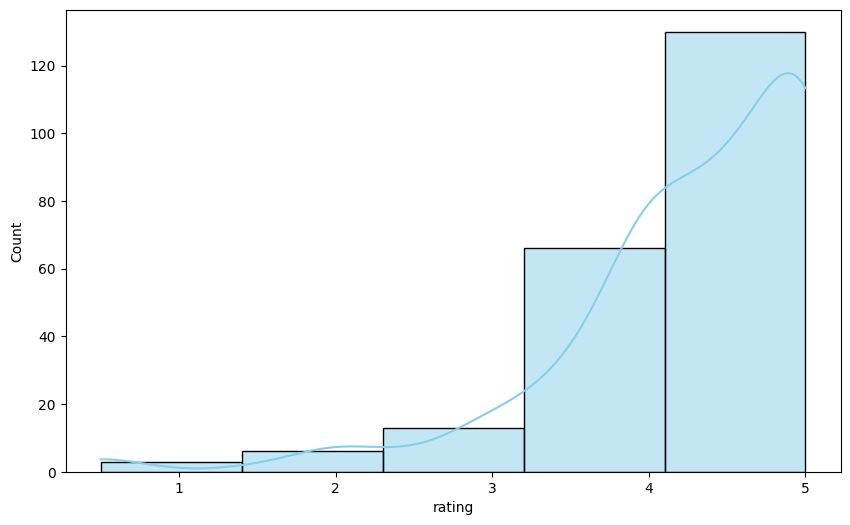

In [21]:
movie_ratings = df_rating[df_rating['movieId'] == movie_id]


plt.figure(figsize=(10, 6))
sns.histplot(movie_ratings['rating'], bins=5, kde=True, color='skyblue')

In [25]:
import pandas as pd


movies_df = pd.read_csv('/content/movies.csv')
ratings_df = pd.read_csv('/content/ratings.csv')


grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()


merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')




<ipython-input-25-3ce9844d9155>:12: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')
<ipython-input-25-3ce9844d9155>:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')


In [26]:
merged_df.head()

,movieId,title,genres,"(rating, count)","(rating, mean)"
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


In [29]:

filtered_movies = merged_df[merged_df[('rating', 'count')] > 50]


filtered_movies.head()


,movieId,title,genres,"(rating, count)","(rating, mean)"
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [32]:

most_popular_movie = filtered_movies[filtered_movies[('rating', 'mean')] == filtered_movies[('rating', 'mean')].max()]

most_popular_movie_title = most_popular_movie['title'].iloc[0]
most_popular_movie_avg_rating = most_popular_movie[('rating', 'mean')].iloc[0]

print(f"The most popular movie based on average user ratings is '{most_popular_movie_title}' with an average rating of {most_popular_movie_avg_rating:.2f}.")


The most popular movie based on average user ratings is 'Shawshank Redemption, The (1994)' with an average rating of 4.43.


In [33]:

top_movies_by_ratings = filtered_movies.sort_values(('rating', 'count'), ascending=False)


top_5_movies = top_movies_by_ratings.head(5)


top_5_movies[['title', 'genres', ('rating', 'count'), ('rating', 'mean')]]


,title,genres,"(rating, count)","(rating, mean)"
314,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [34]:

sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False, na=False)]


sorted_sci_fi_movies = sci_fi_movies.sort_values(('rating', 'count'), ascending=False)


third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]


third_most_popular_sci_fi_movie[['title', 'genres', ('rating', 'count'), ('rating', 'mean')]]


title                          Jurassic Park (1993)
genres             Action|Adventure|Sci-Fi|Thriller
(rating, count)                                 238
(rating, mean)                                 3.75
Name: 418, dtype: object

In [35]:
links = pd.read_csv('/content/links.csv')

In [36]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [39]:
! pip install IMDbPY


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 3.5 MB/s eta 0:00:00


In [43]:
import pandas as pd


df = pd.read_csv('/content/links.csv')



In [44]:
df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [45]:

max_rating_movie = df[df['tmdbId'] == df['tmdbId'].max()]


highest_rating_movieId = max_rating_movie['movieId'].values[0]

print("MovieId of the movie with the highest IMDB rating:", highest_rating_movieId)

MovieId of the movie with the highest IMDB rating: 189111


In [51]:
filtered_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False)]


merged_df = pd.merge(filtered_movies, df, on='movieId')


max_rating_scifi_movie = merged_df[merged_df['tmdbId'] == merged_df['tmdbId'].max()]

highest_rating_scifi_movieId = max_rating_scifi_movie['movieId'].values[0]

print("MovieId of the highest-rated Sci-Fi movie:", highest_rating_scifi_movieId)

MovieId of the highest-rated Sci-Fi movie: 122904
